### Heuristic Models
Look at the Seattle weather in the **data** folder. Come up with a heuristic model to predict if it will rain today. Keep in mind this is a time series, which means that you only know what happened historically (before a given date). One example of a heuristic model is: It will rain tomorrow if it rained more than 1 inch (>1.0 PRCP) today. Describe your heuristic model in the next cell.

**your model here**  

Examples:  

If rained yesterday it will rain today.  
If it rained yesterday or the day before it will rain today.

In [1]:
#here is an example of how to build and populate a hurestic model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time
import datetime
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, recall_score, precision_score


In [2]:
# Load Data
df = pd.read_csv('seattle_weather_1948-2017.csv')

In [3]:
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [5]:
df.describe()

,PRCP,TMAX,TMIN
count,25548.000000,25551.000000,25551.000000
mean,0.106222,59.544206,44.514226
std,0.239031,12.772984,8.892836
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,45.000000
75%,0.100000,69.000000,52.000000
max,5.020000,103.000000,71.000000


In [6]:
df.describe(exclude='number')

,DATE,RAIN
count,25551,25548
unique,25551,2
top,1948-01-01,False
freq,1,14648


In [7]:
# Find nulls in PRCP column
df[pd.isnull(df['PRCP'])]

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


In [8]:
# Find nulls in RAIN column
df[pd.isnull(df['RAIN'])]

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


<AxesSubplot:xlabel='RAIN', ylabel='count'>

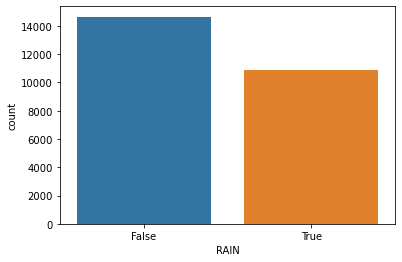

In [9]:
# Look at our target class distribution
sns.countplot(data=df, x='RAIN')

In [10]:
df['PRCP'].mean()

0.10622162204477956

### Create functions to handle NaN values

In [11]:
# We are inserting false since it is the most frequent possibility 

def RAIN_INSERTION(cols):
    """
    Insert False where NaN values are present
    """
    # Note: the input is a dataframe and we are selecting the first column
    RAIN=cols[0]
    if pd.isnull(RAIN):
        return False
    else:
        return RAIN

In [12]:
# We are replacing null values in the precipitation with the mean value

def PRCP_INSERTION(col):
    """
    Insert the Mean of PRCP where NaN values are present
    """
    # Note: the input is a dataframe and we are selecting the first column
    PRCP=col[0]
    if pd.isnull(PRCP):
        return df['PRCP'].mean()
    else:
        return PRCP

In [13]:
df[['RAIN']]

,RAIN
0,True
1,True
2,True
3,True
4,True
...,...
25546,False
25547,False
25548,False
25549,False


In [14]:
# Apply the functions --> handling missing values 

df['RAIN']=df[['RAIN']].apply(RAIN_INSERTION,axis=1)

In [15]:
# Apply the functions --> handling missing values 

df['PRCP']=df[['PRCP']].apply(PRCP_INSERTION,axis=1)

In [16]:
# Check for NaN values

df[pd.isnull(df['RAIN'])]

,DATE,PRCP,TMAX,TMIN,RAIN


In [17]:
df[pd.isnull(df['PRCP'])]

,DATE,PRCP,TMAX,TMIN,RAIN


Text(0.5, 1.0, 'Precipitation Vs Minimum Temperature')

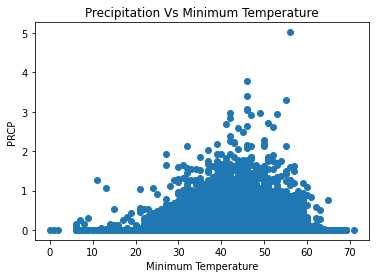

In [18]:
plt.scatter(x='TMIN',y='PRCP',data=df)
plt.xlabel('Minimum Temperature')
plt.ylabel('PRCP')
plt.title('Precipitation Vs Minimum Temperature')

Text(0.5, 1.0, 'Precipitation Vs Maximum Temperature')

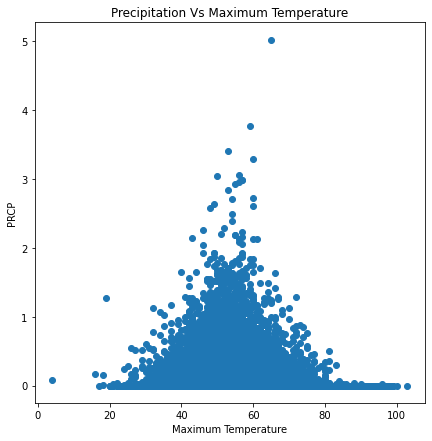

In [19]:
plt.figure(figsize=(7,7))
plt.scatter(x='TMAX',y='PRCP',data=df)
plt.xlabel('Maximum Temperature')
plt.ylabel('PRCP')
plt.title('Precipitation Vs Maximum Temperature')


<AxesSubplot:xlabel='TMIN', ylabel='Density'>

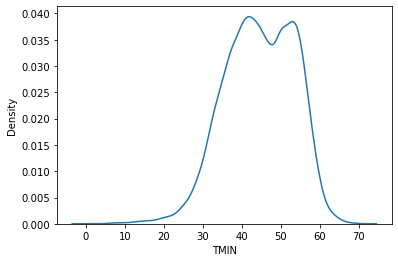

In [20]:
sns.kdeplot(df['TMIN'])

<AxesSubplot:xlabel='TMAX', ylabel='Density'>

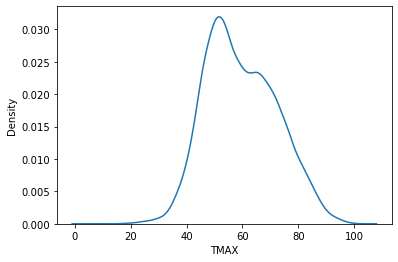

In [21]:
sns.kdeplot(df['TMAX'])

In [22]:
# Note: we need to convert the type to an integer to use the pairplot 
# Otherwise it will give us an error

df['RAIN'] = df['RAIN'].astype(int)

<AxesSubplot:>

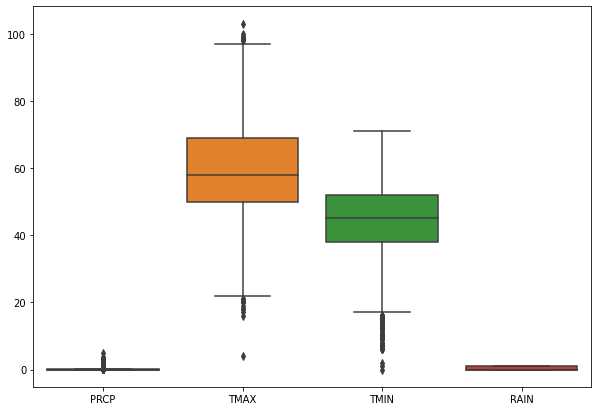

In [23]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df)

### Coding a Heuristic by hand and evaluating

- If it rained yesterday or the day before then it will rain today

In [24]:
# Reset index and drop index column
df = df.reset_index().drop("index", axis=1)

In [59]:
df.loc[df.PRCP >0.01].iloc[:, 0:]

,DATE,PRCP,TMAX,TMIN,RAIN,preds,FP,TP,FN,TN
0,1948-01-01,0.47,51,42,1,False,0.0,0.0,1.0,0.0
1,1948-01-02,0.59,45,36,1,False,0.0,0.0,1.0,0.0
2,1948-01-03,0.42,45,35,1,True,0.0,1.0,0.0,0.0
3,1948-01-04,0.31,45,34,1,True,0.0,1.0,0.0,0.0
4,1948-01-05,0.17,45,32,1,True,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
25534,2017-11-28,0.68,47,43,1,True,0.0,1.0,0.0,0.0
25536,2017-11-30,0.27,46,41,1,True,0.0,1.0,0.0,0.0
25537,2017-12-01,0.27,48,38,1,True,0.0,1.0,0.0,0.0
25538,2017-12-02,0.79,44,41,1,True,0.0,1.0,0.0,0.0


In [57]:
# Create function to perform our heuristic

# rain --> rain
# rain, 'unknown' --> rain 

def heuristic(df):
    
    """
    Simple heuristic:
    
    If it rained yesterday or rains today, it will rain tomorrow.
    
    It will rain tomorrow if it rained more than 1 inch (>1.0 PRCP) today.
    
    First two rows are predicted false be default
    """
    #empty set for HM prediction
    preds = []
    for x in range(len(df)):
        # If first two rows then predict false
        if x <2:
            preds.append(False)
        else:
            # If either of last two days == True then predict true
            # x --> now
            # x-1 --> yesterday 
            # x-2 --> two days ago "The day before yesterday"
           # if df.iloc[(df[df["PRCP"] >= 0.01])]:
            if (df.iloc[x-1]["RAIN"] == True) | (df.iloc[1]["RAIN"] == True):
                preds.append(True)
            if df.loc[df.PRCP >0.01].iloc[:, 0:]:
                 preds.append(True)
            else:
                # Predict false if the above is not true
                preds.append(False)
    return preds

In [60]:
# Apply Heuristic
df["preds"] = heuristic(df )

df.head()

In [27]:
# Determine Accuracy

# Create function to to find values

def calc_confuse(df):
    
    "Calculate all possible results of a confusion matrix"
    
    # Initialzing the arrays to zero 
    # These arrays will be used to save the values
    FP = np.zeros(len(df))
    TP = np.zeros(len(df))
    FN = np.zeros(len(df))
    TN = np.zeros(len(df))
    
    for x in range(len(df)):
        
        # positive --> weather is raining 
        # negative --> weather is not raining 
        
        # True Positive
        if (df["RAIN"].iloc[x] == True) & (df["preds"].iloc[x] == True):
            TP[x] = 1
        # True Negative
        elif (df["RAIN"].iloc[x] == False) & (df["preds"].iloc[x] == False):
            TN[x] = 1
        # False Negative --> wrong prediction , prediction = not happening
        elif (df["RAIN"].iloc[x] == True) & (df["preds"].iloc[x] == False):
            FN[x] = 1
        # False Positive --> wrong prediction , prediction = happening
        else:
            FP[x] = 1
    
    return FP, TP, FN, TN

In [28]:
# Extract results and create columns for each
w,x,y,z = calc_confuse(df)

df["FP"] = w
df["TP"] = x
df["FN"] = y
df["TN"] = z

# Look at 10 random rows to determin accuracy
df.sample(10)

,DATE,PRCP,TMAX,TMIN,RAIN,preds,FP,TP,FN,TN
9044,1972-10-05,0.00,60,43,0,True,1.0,0.0,0.0,0.0
17543,1996-01-12,0.00,51,33,0,True,1.0,0.0,0.0,0.0
22685,2010-02-09,0.00,46,36,0,True,1.0,0.0,0.0,0.0
20338,2003-09-07,0.22,68,55,1,True,0.0,1.0,0.0,0.0
12298,1981-09-02,0.00,70,53,0,True,1.0,0.0,0.0,0.0
21840,2007-10-18,0.23,60,45,1,True,0.0,1.0,0.0,0.0
21320,2006-05-16,0.00,83,59,0,True,1.0,0.0,0.0,0.0
20802,2004-12-14,0.12,53,47,1,True,0.0,1.0,0.0,0.0
21778,2007-08-17,0.00,76,55,0,True,1.0,0.0,0.0,0.0
2049,1953-08-11,0.00,81,53,0,True,1.0,0.0,0.0,0.0


In [29]:
# Calculate Accuracy
(sum(df["TP"]) + sum(df["TN"])) / len(df)

0.42651950999960864

In [30]:
# Baseline Model Prediction

# What would be our accuracy if we predicted the majority class

df["RAIN"].value_counts(normalize=True)

0    0.573402
1    0.426598
Name: RAIN, dtype: float64

### Important Note: our heuristic is not good since we cannot predict better than guessing the majority class every time.

### How could we further improve our model?


<AxesSubplot:xlabel='RAIN', ylabel='count'>

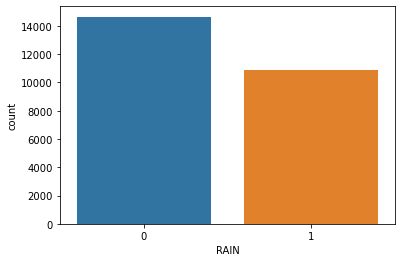

In [31]:
# Look at our target class distribution
sns.countplot(data=df, x='RAIN')

In [32]:
# Note: that the true and false in the rain is of type boolean NOT string

df['RAIN'].value_counts()

0    14651
1    10900
Name: RAIN, dtype: int64

(array([   9.,   13.,   45.,  215., 1345., 3049., 3226., 1994.,  938.,
          66.]),
 array([ 6. , 11.9, 17.8, 23.7, 29.6, 35.5, 41.4, 47.3, 53.2, 59.1, 65. ]),
 <BarContainer object of 10 artists>)

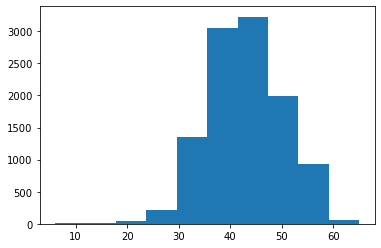

In [33]:
# Filter DataFrame for days that had rain 

condition = df["RAIN"] == True
df_rain = df[condition]

# sns.countplot(data=df_rain, x='TMIN')

plt.hist(df_rain['TMIN'], bins=10)

(array([7.469e+03, 1.953e+03, 7.840e+02, 3.520e+02, 1.540e+02, 8.900e+01,
        5.100e+01, 1.600e+01, 1.300e+01, 3.000e+00, 5.000e+00, 5.000e+00,
        2.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([0.01  , 0.2605, 0.511 , 0.7615, 1.012 , 1.2625, 1.513 , 1.7635,
        2.014 , 2.2645, 2.515 , 2.7655, 3.016 , 3.2665, 3.517 , 3.7675,
        4.018 , 4.2685, 4.519 , 4.7695, 5.02  ]),
 <BarContainer object of 20 artists>)

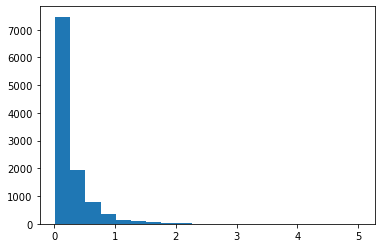

In [34]:
condition = df["RAIN"] == True
df_rain = df[condition]

plt.hist(df_rain['PRCP'], bins=20)

(array([1.4648e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([0.        , 0.00531108, 0.01062216, 0.01593324, 0.02124432,
        0.02655541, 0.03186649, 0.03717757, 0.04248865, 0.04779973,
        0.05311081, 0.05842189, 0.06373297, 0.06904405, 0.07435514,
        0.07966622, 0.0849773 , 0.09028838, 0.09559946, 0.10091054,
        0.10622162]),
 <BarContainer object of 20 artists>)

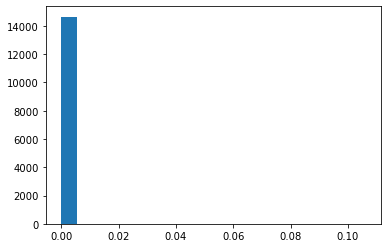

In [35]:
condition = df["RAIN"] == False
df_not_rain = df[condition]

plt.hist(df_not_rain['PRCP'], bins=20)

In [36]:
# Create function to perform our heuristic

def heuristic_temp(df):
    
    """
    Simple heuristic:
    
    It will rain if the temperature is between 35 and 55
    
    Frist two rows are predicted false be default
    """
    
    preds = []
    for x in range(len(df)):
        # If first two rows then predict false
        if x <2:
            preds.append(False)
        else:
            # If either of last two days == True then predict true
            if (df.iloc[x]["TMIN"] > 35) & (df.iloc[x]["TMIN"] < 55):
                preds.append(True)
            else:
                # Predict false if the above is not true
                preds.append(False)
    return preds


def calc_confuse(df):
    
    "Calculate all possible results of a confusion matrix"

    # Hold all possible values and set to zero
    FP = np.zeros(len(df))
    TP = np.zeros(len(df))
    FN = np.zeros(len(df))
    TN = np.zeros(len(df))
    
    for x in range(len(df)):
        
        # True Positive
        if (df["RAIN"].iloc[x] == True) & (df["preds"].iloc[x] == True):
            TP[x] = 1
        # True Negative
        elif (df["RAIN"].iloc[x] == False) & (df["preds"].iloc[x] == False):
            TN[x] = 1
        # False Negative
        elif (df["RAIN"].iloc[x] == True) & (df["preds"].iloc[x] == False):
            FN[x] = 1
        # False Positive
        else:
            FP[x] = 1
    
    return FP, TP, FN, TN

In [37]:
# Create a copy of the dataframe

df_temp = df.copy()

df_temp["preds"] = heuristic_temp(df_temp) # Create a column of predictions

confuse_ls = [w,x,y,z] = calc_confuse(df_temp) # Calculate confusion matrix stats
col_names = ["FP", "TP", "FN", "TN"] # Create column name ls

# Create new columns
for x in range(len(confuse_ls)):
    df_temp[col_names[x]] = confuse_ls[x]

# Look at 10 random rows to determine the accuracy
df_temp.sample(10)

,DATE,PRCP,TMAX,TMIN,RAIN,preds,FP,TP,FN,TN
4674,1960-10-18,0.00,65,44,0,True,1.0,0.0,0.0,0.0
24207,2014-04-11,0.00,63,41,0,True,1.0,0.0,0.0,0.0
14214,1986-12-01,0.05,48,35,1,False,0.0,0.0,1.0,0.0
780,1950-02-19,0.00,46,34,0,False,0.0,0.0,0.0,1.0
19171,2000-06-27,0.00,88,58,0,False,0.0,0.0,0.0,1.0
16622,1993-07-05,0.00,68,54,0,True,1.0,0.0,0.0,0.0
9016,1972-09-07,0.01,65,55,1,False,0.0,0.0,1.0,0.0
20927,2005-04-18,0.01,57,43,1,True,0.0,1.0,0.0,0.0
2573,1955-01-17,0.08,44,35,1,False,0.0,0.0,1.0,0.0
23551,2012-06-24,0.00,67,49,0,True,1.0,0.0,0.0,0.0


In [38]:
# Calculate Accuracy

(sum(df_temp["TP"]) + sum(df_temp["TN"])) / len(df_temp)



0.5448319048178154

In [39]:
# Calculate Precision 

sum(df_temp["TP"])/ (sum(df_temp["TP"]) + sum(df_temp["FN"]))
    

0.7804587155963303

In [40]:
# Calculate Recall

sum(df_temp["TP"])/ (sum(df_temp["TP"]) + sum(df_temp["FP"]))
    

0.4794296663660956

# Cost (Loss) Functions
- [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error)
- [Mean Absolute Error](https://en.wikipedia.org/wiki/Mean_absolute_error)
- [Root Mean Squared Error](https://en.wikipedia.org/wiki/Root-mean-square_deviation)
- [Residual Sum of Squares](https://en.wikipedia.org/wiki/Residual_sum_of_squares)
- [Precision, Recall, Accuracy](https://en.wikipedia.org/wiki/Precision_and_recall)
- [Confusion Matrix](https://en.wikipedia.org/wiki/Confusion_matrix)
- [Gradient Descent](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html)

#### Some Videos
- [Loss Functions Explained](https://www.youtube.com/watch?v=IVVVjBSk9N0)
- [Loss Functions - EXPLAINED!](https://www.youtube.com/watch?v=QBbC3Cjsnjg)
- [Machine learning fundamentals (I): Cost functions and gradient descent](https://towardsdatascience.com/machine-learning-fundamentals-via-linear-regression-41a5d11f5220) (not a video)

#### Note: Supervised vs Unsupervised ML
> **Supervised learning**: Models that can predict labels based on labeled training data
> - Classification: Models that predict labels as two or more discrete categories
> - Regression: Models that predict continuous labels

> **Unsupervised learning**: Models that identify structure in unlabeled data
> - Clustering: Models that detect and identify distinct groups in the data
> - Dimensionality reduction: Models that detect and identify lower-dimensional structure in higher-dimensional data

> Source: [What is Machine Learning?](https://jakevdp.github.io/PythonDataScienceHandbook/05.01-what-is-machine-learning.html)
 though?

---

## Regression Cost Functions



#### Mean Error

- In this cost function, the error for each training data is calculated and then the mean value of all these errors is derived.
- Calculating the mean of the errors is the simplest and most intuitive way possible.
- The errors can be both negative and positive. So they can cancel each other out during summation giving zero mean error for the model.
- Thus this is not a recommended cost function but it does lay the foundation for other cost functions of regression models.

#### Mean Squared Error
[Reference](https://en.wikipedia.org/wiki/Mean_squared_error)

![](https://www.gstatic.com/education/formulas2/355397047/en/mean_squared_error.svg)

- Here a square of the difference between the actual and predicted value is calculated to avoid any possibility of negative error.
- It measures the average of the sum of squared differences between predictions and actual observations.
- Also known as L2 loss.
- In MSE, since each error is squared, it helps to penalize even small deviations in prediction when compared to MAE. But if our dataset has outliers that contribute to larger prediction errors, then squaring this error further will magnify the error many times more and also lead to higher MSE error.
- Less robust to outliers

In [41]:
preds = np.array([10, 9, 10, 9, 10, 9, 10, 9, 10])

In [42]:
labels = np.array([10, 9, 10, 2, 3, 5, 7, 19, 21])

In [43]:
mean_squared_error(preds, labels)

38.22222222222222

#### Mean Absolute Error
[Reference](https://en.wikipedia.org/wiki/Mean_absolute_error)

![](https://www.gstatic.com/education/formulas2/355397047/en/mean_absolute_error.svg)

- MAE addresses the shortcoming of mean error differently. Here an absolute difference between the actual and predicted value is calculated to avoid any possibility of negative error.
- MAE is measured as the average of the sum of absolute differences between predictions and actual observations.
- Also known as L1 Loss.
- It is robust to outliers thus it will give better results even when our dataset has noise or outliers.
- Give the same importance to all errors

In [44]:
mean_absolute_error(preds, labels)

4.666666666666667

#### Root Mean Squared Deviation

[Reference](https://en.wikipedia.org/wiki/Root-mean-square_deviation#:~:text=The%20root%2Dmean%2Dsquare%20deviation,estimator%20and%20the%20values%20observed.&text=RMSD%20is%20the%20square%20root%20of%20the%20average%20of%20squared%20errors.)

![](https://www.gstatic.com/education/formulas2/355397047/en/root_mean_square_deviation.svg)

- Defined as the square root of the average squared error.
- RMSE does not treat each error the same.
- Gives more importance to the most significant errors.
- One big error is enough to get a very bad RMSE.
- Sensitive to outliers.

#### Note: sklearn.metrics has a mean_squared_error function with a squared kwarg (defaults to True). Setting squared to False will return the RMSE.



In [45]:
mean_squared_error(preds, labels, squared=False)

6.182412330330469

#### Residual Sum of Squared Error
[Reference](https://en.wikipedia.org/wiki/Residual_sum_of_squares)

![](https://www.gstatic.com/education/formulas2/355397047/en/residual_sum_of_squares.svg)

- Measures the overall difference between your data and the values predicted by your estimation model (a “residual” is a measure of the distance from a data point to a regression line).
- Tells you how much of the dependent variable’s variation your model did not explain.
- It is the sum of the squared differences between the actual Y and the predicted Y
- The smaller the residual sum of squares, the better your model fits your data
- The greater the residual sum of squares, the poorer your model fits your data.
- One major use is in finding the coefficient of determination (R2). The coefficient of determination is a ratio of the explained sum of squares to the total sum of squares.

---

## Classification

precision 
- is the fraction of relevant instances among the retrieved instances
-(also called positive predictive value)

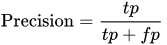

recall 
- is the fraction of relevant instances that were retrieved.
- (also known as sensitivity) 

Both precision and recall are therefore based on relevance.

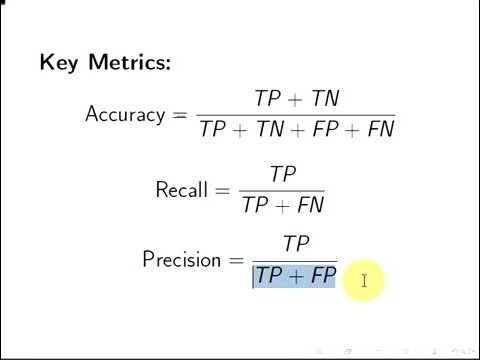


